Welcome to JupyROOT 6.28/04
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001433_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001434_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001435_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001436_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001437_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001438_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001439_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001440_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001441_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001442_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001443_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001444_000.root
Reading file: rec.mu2e.CRV_wideband_

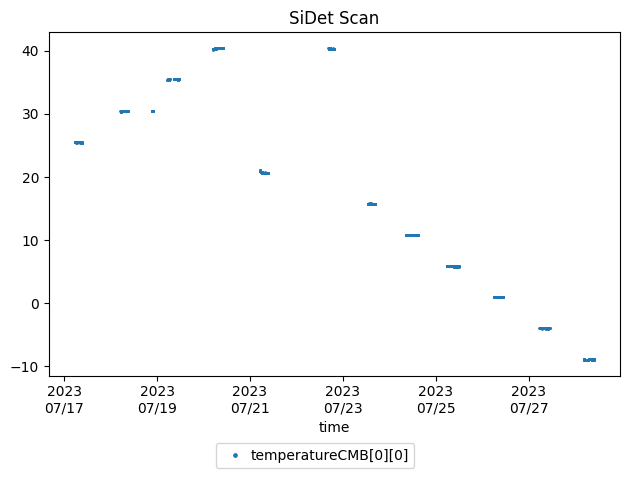

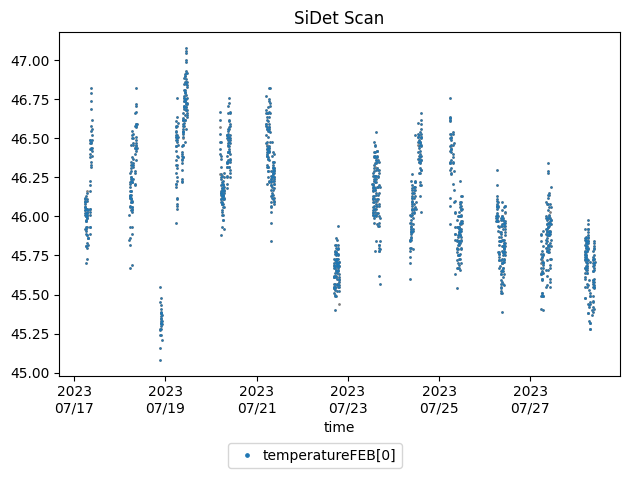

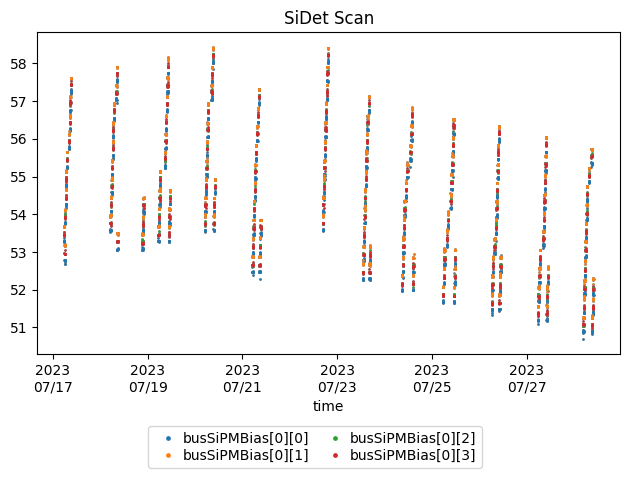

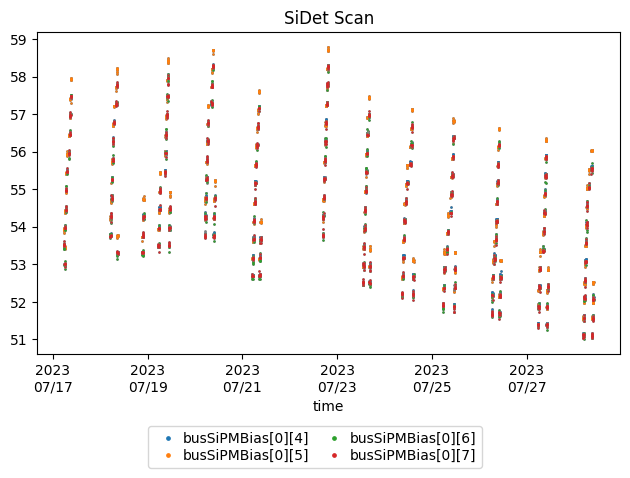

In [1]:
from __future__ import print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
%jsroot on
from ROOT import gROOT, gStyle, gDirectory, gPad

from array import array

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath

gROOT.Reset()
gROOT.SetBatch(1)
gROOT.ProcessLine( "gErrorIgnoreLevel = 1001;")
gStyle.SetOptStat(111110)
gStyle.SetOptFit(0)
gStyle.SetLineScalePS(0.3)

topdir = os.path.dirname(os.path.abspath("__file__"))

fileList = filepath.getfilelist(["SiDetTempScan"],"recoROOT",3)[0]

nSmooth = 1 
tdict = {'*':[["temperatureCMB[0][0]"],
              ["temperatureFEB[0]"],
              ["busSiPMBias[0][0:4]"],
              ["busSiPMBias[0][4:8]"]]}
tfig = utils.plot_dqm(fileList, tdict, '==0x0', False, nSmooth, True, "SiDet Scan;time;") 

In [5]:
import pandas as pd
analysis_dir = os.path.join(topdir,"analysis_root_files")

df = pd.DataFrame()

for index, file in enumerate(fileList):
    df_ = pd.DataFrame()
    df_['name'] = file
    runNum = filepath.filenameparser(file, 'run')
    df_['run'] = runNum
    df_['subrun'] = filepath.filenameparser(file, 'subrun')
    calibRaw, calibAdj = utils.calibExtract_root(file)[1:]
    df_['calibRaw'] = calibRaw.flatten()
    df_['calibAdj'] = calibAdj.flatten()
    ii = filepath.datatag['SiDetTempScan']['run#'].index(runNum)
    df_['tempN'] = filepath.datatag['SiDetTempScan']['tempN'][ii]
    df_['FEBBias'] = filepath.datatag['SiDetTempScan']['FEBBias'][ii]
    df_['highGain'] = filepath.datatag['SiDetTempScan']['highGain'][ii]
    
    df = pd.concat([df,df_], ignore_index=True)

Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001433_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001434_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001435_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001436_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001437_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001438_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001439_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001440_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001441_000.root
Loading calibration information from rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.001442

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.